### Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### Creating our data $\left(\footnotesize y = \frac{1}{3} + \frac{2}{3}X  \right)$

In [2]:
# Create X as an array of range 0-300, step 1
X = np.arange(0,301,1).reshape(-1,1)


y = 1/3 + ((2/3)* X) 

print(f"First 3 entries of X: \n{X[0:3]}\n\n First 3 entries of y: \n{y[0:3]}")

First 3 entries of X: 
[[0]
 [1]
 [2]]

 First 3 entries of y: 
[[0.33333333]
 [1.        ]
 [1.66666667]]


### Feature Scaling using Standarization (Improve Calculation Time)

In [3]:

mu = np.mean(X)    # Compute the mean of X
sig = np.std(X)    # Compute the standard deviation of X
X = (X - mu) / sig   # Perform the standardization


X[0:3]

array([[-1.72630601],
       [-1.71479731],
       [-1.7032886 ]])

### Add a column of ones to our X vector, creating the Design Matrix

In [4]:
# Create a column of ones that matches the number of rows in X
ones = np.ones((np.shape(X)[0], 1))

# Concatenate the column of ones to the front of matrix X
X = np.c_[ones, X]

X[0:3]

array([[ 1.        , -1.72630601],
       [ 1.        , -1.71479731],
       [ 1.        , -1.7032886 ]])

### Iniatlise random weights vector

Where:
- first entry = bias (Intercept)
- second entry = weight (X coeffecient)

In [5]:
weights = np.random.rand(X.shape[1]).reshape(-1,1)

weights

array([[0.61037422],
       [0.8471665 ]])

### Create our hypothesis function

In [6]:
def hypothesis(X, weights):
    return X @ weights

hypothesis(X, weights)[:3]

array([[-0.8520944 ],
       [-0.8423446 ],
       [-0.83259481]])

### Create our Cost function (Measure Model Performance)

In [7]:
# Cost function (MSE)
def cost_function(predicted_y, y):

    cost = np.mean((predicted_y - y) ** 2)
    return cost


### Create our Gradient Descent function

Gradient descent algorithm is given by: $\large \vec{w} =: \vec{w} - \alpha \cdot \nabla J(\vec{w})$

Where our gradient $(\nabla J)$ is given by:  $\large \quad \nabla J(\vec{w}) = \frac{1}{m} X^T(X\vec{w}-y)$

In [8]:
def gradient_descent(X,y, weights, learning_rate= 0.0003, stopping_threshold= 1E-12):

    # Variable to track current epoch 
    epoch = 0

    # Track Cost's history for Convergence Monitoring
    cost_history = []
    
    # Intialise previous cost as infinity
    prev_cost = float('inf')

    # Number of training examples
    m = len(y)

    # Loop until cost convergence
    while True:

        # Calculate predicted y values
        predicted_y = hypothesis(X, weights)

        # Error in predicted y values vs true y values
        error = predicted_y - y
        
        # Calculate cost with current weights
        cost = cost_function(predicted_y, y)

        # Calculate Gradient
        gradient = (X.T  @ error) / m

        # Update Weights
        weights = weights - learning_rate * gradient
        
        # If change in cost from one epoch to another is less than our stopping threshold declare convergence.
        if np.abs(cost - prev_cost) < stopping_threshold:
            print("-" * 60 + "\n")
            print(f"Convergence reached at Epoch: {epoch}")
            break
        
        # Else, update our previous cost and add to our cost history
        prev_cost = cost
        cost_history.append(cost)

        

        # Printing Epoch and Cost
        if epoch % 1000 == 0 and epoch != 0:
            prev_cost = cost
            print(f"Epoch {epoch}: Cost {cost}")
        
        epoch +=1

    return  epoch, weights, cost_history


epoch, weights, cost_history = gradient_descent(X,y, weights)



Epoch 1000: Cost 7245.19470897548
Epoch 2000: Cost 3975.8892443292425
Epoch 3000: Cost 2181.8178693790037
Epoch 4000: Cost 1197.2992512130731
Epoch 5000: Cost 657.0326135258106
Epoch 6000: Cost 360.5546857222031
Epoch 7000: Cost 197.8587953170585
Epoch 8000: Cost 108.57743480965367
Epoch 9000: Cost 59.5831958389978
Epoch 10000: Cost 32.69700774025429
Epoch 11000: Cost 17.942883058088405
Epoch 12000: Cost 9.846376616287639
Epoch 13000: Cost 5.403319642441423
Epoch 14000: Cost 2.96513776551019
Epoch 15000: Cost 1.6271556284393134
Epoch 16000: Cost 0.8929215599890482
Epoch 17000: Cost 0.49000163128710744
Epoch 18000: Cost 0.26889439052957503
Epoch 19000: Cost 0.14755908683074334
Epoch 20000: Cost 0.08097485434130715
Epoch 21000: Cost 0.04443594207875299
Epoch 22000: Cost 0.02438476690673587
Epoch 23000: Cost 0.013381439197182349
Epoch 24000: Cost 0.007343228486589925
Epoch 25000: Cost 0.004029686479285007
Epoch 26000: Cost 0.0022113397602945496
Epoch 27000: Cost 0.0012134997500604992
Epoc

### Plot Cost vs Epochs

Text(0, 0.5, 'Cost')

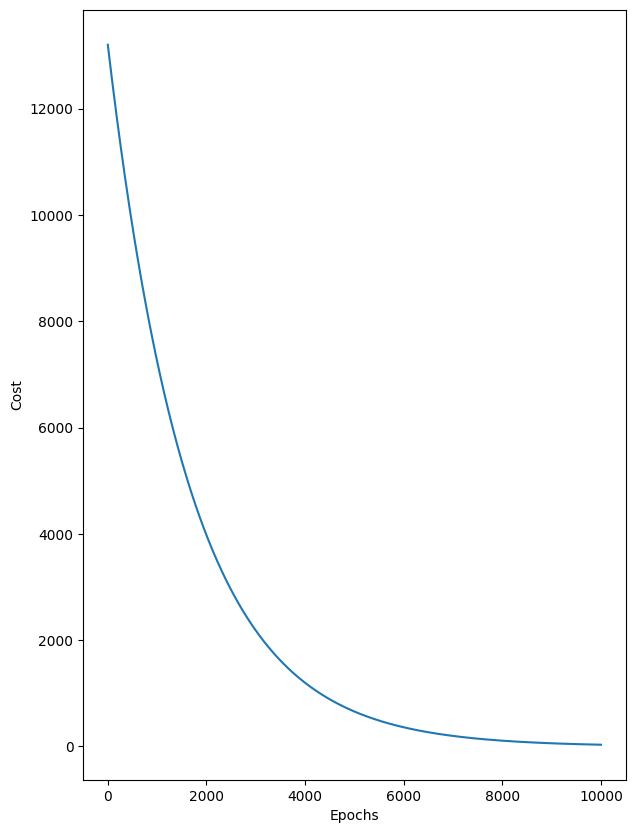

In [9]:


plt.figure(figsize=(7,10))
plt.plot(np.arange(epoch)[:10000], cost_history[:10000])
plt.xlabel("Epochs")
plt.ylabel("Cost")


# ax2.plot(np.arange(epoch), cost_history)
# ax2.set_xlabel("Epochs")
# ax2.set_ylabel("Cost (Log)")
# ax2.set_yscale('log')

### Destandardise weights $\scriptsize (\beta + \omega)$

In [10]:
weights_0_prime = weights[0] - (weights[1] * mu) / sig
weights_1_prime = weights[1] / sig

weights = np.array([weights_0_prime, weights_1_prime])
weights

array([[0.33333291],
       [0.66666643]])

### True Answers

In [12]:
X[:,1] = (X[:,1] * sig) + mu # Destandardise Second Column
weights = np.linalg.pinv(X.T @ X) @ X.T @ y # Use normal equation to calculate weights
weights

array([[0.33333333],
       [0.66666667]])